<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/13_Capstone/Model_building_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
 - Train  a neural network model which can predict is the patience is affected or not.
 - sample images are taken from the population ( considering the distripution of the data like *****)
 - sample  Train Image - 500 postive images 500 negative images
 - sample Test Image - 50 postive and 50 negative images
 - xray images of 512 * 512 are the input to the model
 - evaluation metrics - recall
 - conclution is performed with comparing different models ( classification metrix, loss vs accuracy & classification report ) 






### Load lib and data

In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9 MB 4.3 MB/s 


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import pydicom as dicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import tensorflow as tf

In [7]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [8]:
META_DATA = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/final_data.csv"
DATA_ROOT_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/"

META_DATA,DATA_ROOT_PATH

('/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/final_data.csv',
 '/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/')

In [13]:
metadata_df = pd.read_csv(META_DATA)
metadata_df.drop(labels= ["Unnamed: 0"], axis=1,inplace=True)
metadata_df.head()

,patientId,x,y,width,height,Target,class,filepath,Train_or_Test,area,age,sex,ViewPosition,BodyPartExamined
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,51,F,PA,CHEST
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,48,F,PA,CHEST
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,19,M,AP,CHEST
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,28,M,PA,CHEST
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,80727.0,32,F,AP,CHEST


### sample data for model building
 - from EDA , ViewPosition  ( PA and AP  ) influence the orientation of the xray . So the sampling is done by considering  ViewPosition

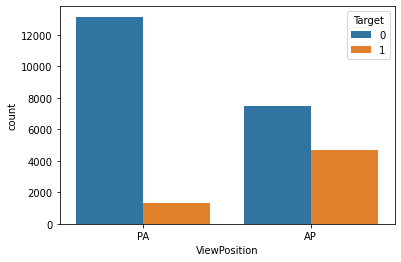

In [18]:
sns.countplot(data = metadata_df[["patientId","Target","ViewPosition"]].drop_duplicates(),x="ViewPosition",hue="Target")
plt.show()

In [50]:
SAMPLE_SIZE = 650
sampled_metadata = pd.DataFrame(columns=["patientId","Target","ViewPosition","filepath"])

In [51]:
pa_count = metadata_df.query("ViewPosition == 'PA' & Target == 1")[["patientId","Target","ViewPosition"]].drop_duplicates().shape[0]
ap_count = metadata_df.query("ViewPosition == 'AP' & Target == 1")[["patientId","Target","ViewPosition"]].drop_duplicates().shape[0]

pa_count_sample_size = int(round(pa_count / (pa_count+ap_count),2) * SAMPLE_SIZE)
ap_count_sample_size = int(round(ap_count / (pa_count+ap_count),2) * SAMPLE_SIZE)

print(pa_count_sample_size,ap_count_sample_size)

sampled_metadata = sampled_metadata.append(metadata_df.query("ViewPosition == 'PA' & Target == 1")[["patientId","Target","ViewPosition","filepath"]].drop_duplicates().sample(n=pa_count_sample_size,random_state=RANDOM_SEED))
sampled_metadata = sampled_metadata.append(metadata_df.query("ViewPosition == 'AP' & Target == 1")[["patientId","Target","ViewPosition","filepath"]].drop_duplicates().sample(n=ap_count_sample_size,random_state=RANDOM_SEED))


143 507


In [52]:
pa_count = metadata_df.query("ViewPosition == 'PA' & Target == 0")[["patientId","Target","ViewPosition"]].drop_duplicates().shape[0]
ap_count = metadata_df.query("ViewPosition == 'AP' & Target == 0")[["patientId","Target","ViewPosition"]].drop_duplicates().shape[0]

pa_count_sample_size = int(round(pa_count / (pa_count+ap_count),2) * SAMPLE_SIZE)
ap_count_sample_size = int(round(ap_count / (pa_count+ap_count),2) * SAMPLE_SIZE)

print(pa_count_sample_size,ap_count_sample_size)

sampled_metadata = sampled_metadata.append(metadata_df.query("ViewPosition == 'PA' & Target == 0")[["patientId","Target","ViewPosition","filepath"]].drop_duplicates().sample(n=pa_count_sample_size,random_state=RANDOM_SEED))
sampled_metadata = sampled_metadata.append(metadata_df.query("ViewPosition == 'AP' & Target == 0")[["patientId","Target","ViewPosition","filepath"]].drop_duplicates().sample(n=ap_count_sample_size,random_state=RANDOM_SEED))


416 234


In [53]:
print(sampled_metadata.shape)
sampled_metadata.head()

(1300, 4)


,patientId,Target,ViewPosition,filepath
25155,e18c7203-a029-4cf4-8151-2bc2460c390c,1,PA,/content/drive/MyDrive/GreatLearning/Captone_p...
1791,18ce990f-bea9-4174-a6a2-8f61c4517b24,1,PA,/content/drive/MyDrive/GreatLearning/Captone_p...
274,068b608d-f71c-4859-b909-62c1665b507f,1,PA,/content/drive/MyDrive/GreatLearning/Captone_p...
16514,9fa17c26-8aae-4dd6-af8a-5750f042adf9,1,PA,/content/drive/MyDrive/GreatLearning/Captone_p...
10831,722503cf-a801-415b-a10e-848bfea55911,1,PA,/content/drive/MyDrive/GreatLearning/Captone_p...


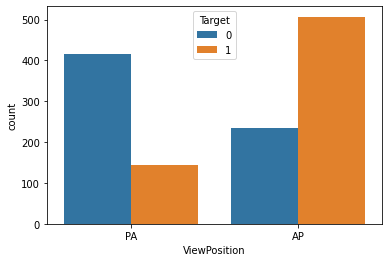

In [54]:
sns.countplot(data = sampled_metadata,x="ViewPosition",hue="Target")

### read the Images
 - reshape and post processing

### Model Building
 - Inscepton Model ( transfer learning ) 
 - Resnet ( transfer learning ) 
 - Model from scratch
 